## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

## Exploratory data analysis

In [2]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

There is no null values present in the data

Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share= round (classes[0]/df['Class'].count()*100,2)
fraud_share=round (classes[1]/df['Class'].count()*100, 2)

print('normal_share --',normal_share)
print('fraud_share --',fraud_share)

normal_share -- 99.83
fraud_share -- 0.17


Text(0.7, 0.45, '492\n(0.1727%)')

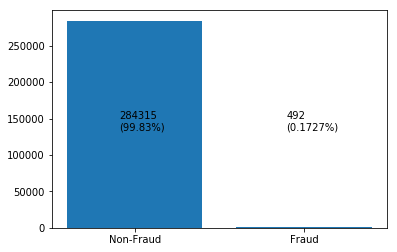

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.bar(['Non-Fraud','Fraud'], df['Class'].value_counts())
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0],
                                   df['Class'].value_counts()[0]/df['Class'].count()*100),
                                   (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                   df['Class'].value_counts()[1]/df['Class'].count()*100),
                                   (0.70, 0.45), xycoords='axes fraction')

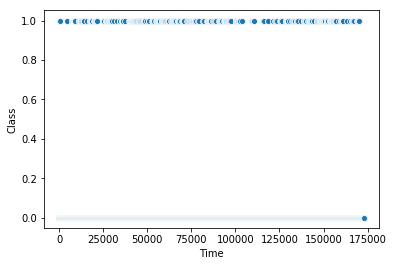

In [6]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(y=df['Class'], x=df['Time'])


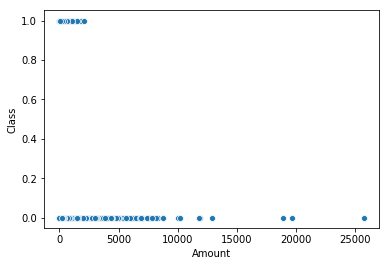

In [7]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(y=df['Class'], x=df['Amount'])


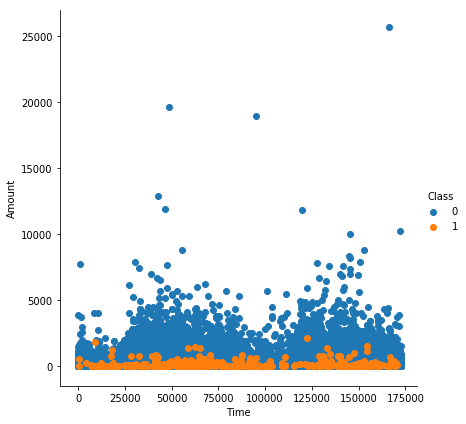

In [8]:
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Observations:

> From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.

> As per with the time, the frauds in the transactions are evenly distributed throughout time.

In [9]:
# Drop unnecessary columns
df.drop('Time',axis=1,inplace=True)

### Splitting the data into train & test data

In [10]:
y= df['Class']#class variable
x=df.drop(['Class'],axis=1)

In [11]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,train_size=0.7,random_state=42)

In [12]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2557,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,-0.434426,...,-0.831985,-0.210837,0.914737,0.867888,0.422969,0.310584,-0.781488,0.392241,-0.147757,1.00
247823,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,-0.359561,...,2.142593,0.853186,-0.091941,-0.936215,-0.833081,-0.498728,0.651183,-0.290331,0.110360,1194.28
152342,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,-0.724328,...,-0.554004,-0.509915,-0.424978,-0.268621,0.010121,0.466862,0.835540,-0.062385,0.088079,75.00
103385,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,-0.130220,...,-0.149985,-0.240464,-0.739862,0.116799,-0.373837,0.125470,0.130126,-0.016956,0.011937,1.98
8771,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,-0.659956,...,0.122458,-0.279519,-0.470181,-0.124037,-1.388839,-0.237453,0.785347,0.349708,0.216207,37.31


In [13]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


In [14]:
y_train.head()

2557      0
247823    0
152342    0
103385    0
8771      0
Name: Class, dtype: int64

In [15]:
y_test.head()

43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
356
136


### Plotting the distribution of a variable

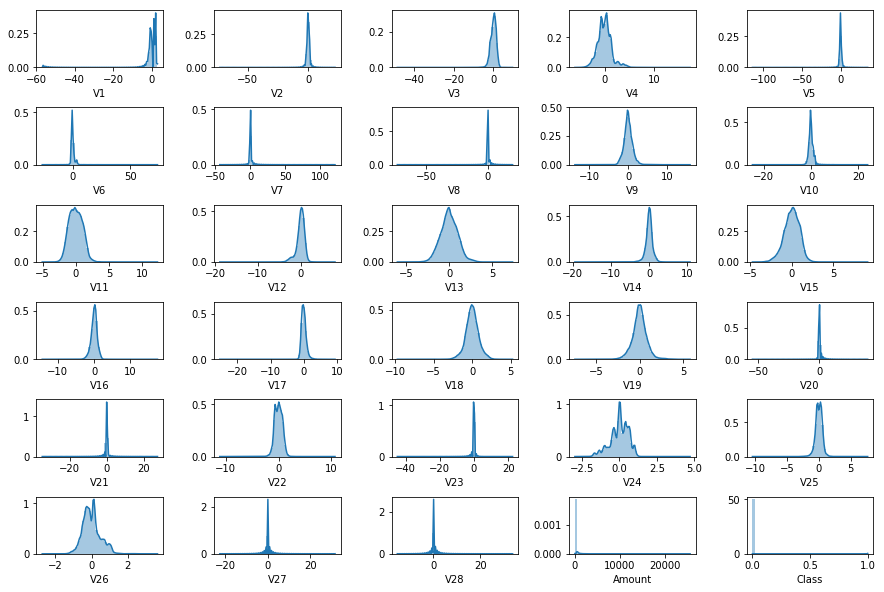

In [17]:
# plot the histogram of a variable from the dataset to see the skewness
j=1
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.7, wspace=0.4)
for i in df.columns:
    plt.subplot(6,5,j)
    sns.distplot(df[i])
    j+=1
   

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [18]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

#X_train, X_test, y_train, y_test

from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()


pt.fit(X_train)
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


pt_y = PowerTransformer()# PowerTransformer requires a matrix/DataFrame
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())


In [19]:
X_train=pd.DataFrame(X_train_pt, columns=X_train.columns)
X_test=pd.DataFrame(X_test_pt, columns=X_test.columns)


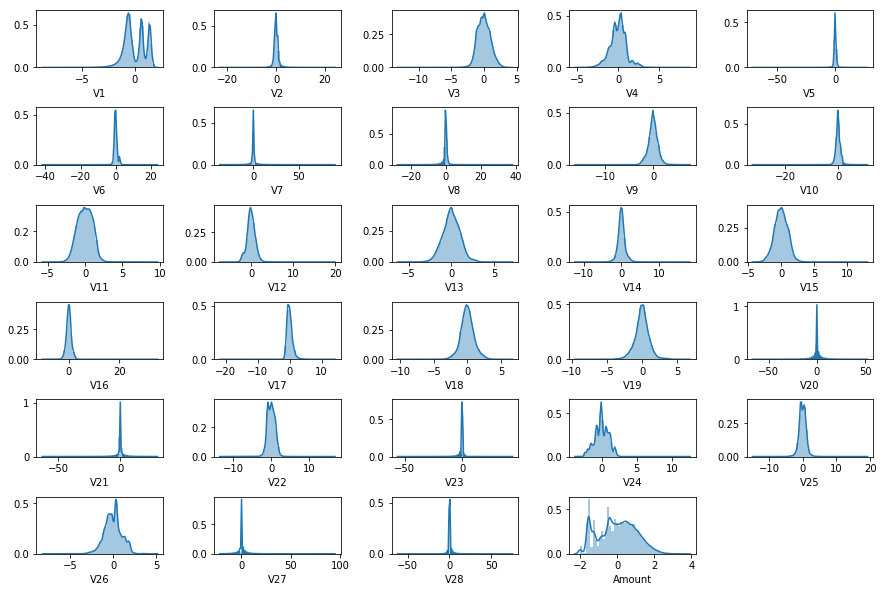

In [20]:
# plot the histogram of a variable from the dataset again to see the result 

j=1
plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.7, wspace=0.4)
for i in X_train.columns:
    plt.subplot(6,5,j)
    sns.distplot(X_train[i])
    j+=1


In [21]:
print(X_train.shape, y_train.shape)

(199364, 29) (199364,)


## Model Building
- Build different models on the imbalanced dataset and see the result

In [22]:
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#### 1. Logistic Regression:

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression  #import the package

lr=LogisticRegression()
lr.fit(X_train,y_train)
x_pred =lr.predict(X_test)


#### using k fold and randomized search

In [26]:
#create Logistic Regression object 
logistic=  LogisticRegression()


#perform hyperparameter tuning

#list of differerent penalty that we need to test our model is saved under variable "penalty"
penalty = ['l1', 'l2'] 


#list of different regularisation strengththat we need to test is saved under "C"
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


#now that we have two lists to test, we can use dictioary to combine them
param_grid = dict (penalty =penalty, C=C)



#fit model using randomized search 
from sklearn.model_selection import RandomizedSearchCV
rsearch = RandomizedSearchCV(logistic,param_grid, n_iter =100, random_state=41,scoring='roc_auc')
rsearch.fit(X_train, y_train)


#print the evaluation result by choosing a evaluation metric
print('Best param',rsearch.best_params_)
print('Best AUC Score: ', rsearch.best_score_)



Best param {'penalty': 'l2', 'C': 0.01}
Best AUC Score:  0.974240944552407


From the randomised search it is seen that best parameters are "L2" penalty and "C" =0.01, hence building K-Fold cv using these parameters

In [27]:
#perform cross validation

from sklearn.model_selection import KFold
kfold=model_selection.KFold(n_splits=5, random_state= 41)

model =LogisticRegression(C=0.01,penalty = 'l2')

results=model_selection.cross_val_score(model,X_train, y_train,cv=kfold, scoring='roc_auc')
print(results)

[0.97152742 0.9527985  0.97794304 0.99196978 0.97540061]


In [28]:
print(results.mean()*100)

97.392787191691


By using K-fold and randomized search method, we get best AUC of 97.39 by using penalty 'L2' and C '0.01'

#### using stratified k split and randomized search

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

#perform cross validation using stratified k fold 
skf=StratifiedKFold(n_splits=5,random_state=None, shuffle=False)


#create Logistic Regression object 
logistic1=LogisticRegression()

i=1
for train_index, test_index in skf.split(X_train, y_train):
    
    print('\n{} of Kfold {}'.format(i,skf.n_splits))
    i+=1
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv  = y_train.iloc[train_index], y_train.iloc[test_index]

    
    #perform hyperparameter tuning
    penalty = ['l1', 'l2']
    C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
    param_grid = dict(penalty=penalty,C=C)
    
    
    #perform randomized search and fit model using randomsearch
    grsearch = RandomizedSearchCV(logistic1,param_grid, n_iter =100, random_state=41,scoring='roc_auc')
    model = grsearch.fit(X_train, y_train)
    #y_test_pred=model.predict(X_test_cv)
    
    #print the evaluation result by choosing a evaluation metric
    print('Best Score: ', model.best_score_)
    print('Best Params: ', model.best_params_)
    #print('F1_score:', f1_score(y_test_cv,y_test_pred))
    


#print the optimum value of hyperparameters


1 of Kfold 5
Best Score:  0.974240944552407
Best Params:  {'penalty': 'l2', 'C': 0.01}

2 of Kfold 5
Best Score:  0.974240944552407
Best Params:  {'penalty': 'l2', 'C': 0.01}

3 of Kfold 5
Best Score:  0.974240944552407
Best Params:  {'penalty': 'l2', 'C': 0.01}

4 of Kfold 5
Best Score:  0.974240944552407
Best Params:  {'penalty': 'l2', 'C': 0.01}

5 of Kfold 5
Best Score:  0.974240944552407
Best Params:  {'penalty': 'l2', 'C': 0.01}


By using Stratified K-fold and randomized search method, we get best AUC of 97.42 by using penalty 'L2' and C '0.01'.

Both Stratified K-fold CV and K-fold CV, we get almost similar AUC score of 97

In [30]:
y_train_pred = model.predict(X_train)

y_train_prob = model.predict_proba(X_train)[:,1]

#[:,1] is used because predict_proba gives you the probabilities for the target (0 and 1 ) in array form 
#and we are selecting only the probability of getting 1

y_train_df = pd.DataFrame( {'y_train':y_train,'y_train_pred':y_train_pred,'y_train_prob':y_train_prob})

y_train_df.head()


,y_train,y_train_pred,y_train_prob
2557,0,0,0.000161
247823,0,0,0.000476
152342,0,0,0.000446
103385,0,0,0.000293
8771,0,0,0.000080


In [24]:
def getModelMetrics(actual,pred):

    confusion = metrics.confusion_matrix(actual,pred)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Accuracy score: {}".format(metrics.accuracy_score(actual,pred)))
    # Let's see the Recall of our logistic regression model
    Recall=TP / float(TP+FN)
    print('Recall : {}'.format(Recall))
    # Let us calculate Precision
    precision =TP/ float(TP+FP)
    print('Precision: {}'.format(precision))
    # Let us calculate F1 score
    print('F1 score : {}'.format( 2*precision*Recall/float(precision+Recall)))

    
    

In [32]:
getModelMetrics(y_train,y_train_pred)

Accuracy score: 0.9991623362292089
Recall : 0.598314606741573
Precision: 0.8987341772151899
F1 score : 0.7183811129848229


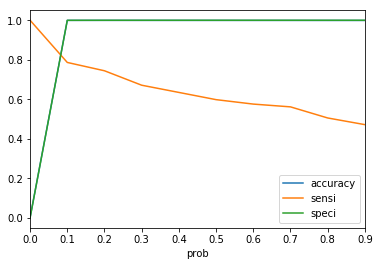

In [33]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df.y_train_prob.map(lambda x: 1 if x > i else 0)

    
# accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df.y_train, y_train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

    
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [34]:
cut_off_prob = 0.1

y_train_df['final_predicted'] = y_train_df.y_train_prob.map( lambda x: 1 if x > cut_off_prob else 0)

getModelMetrics(y_train_df.y_train,y_train_df.final_predicted)

Accuracy score: 0.9992626552436749
Recall : 0.7865168539325843
Precision: 0.7977207977207977
F1 score : 0.7920792079207921


### Decision Tree 

In [35]:
#Decision tree classifier object
dt = DecisionTreeClassifier(max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)

#Fit the algorithm on the data
dt.fit(X_train,y_train)

#Predict training set:
y_train_pred= dt.predict(X_train)

#Let's check the model metrices.
getModelMetrics(y_train,y_train_pred)

Accuracy score: 0.9988663951365342
Recall : 0.5955056179775281
Precision: 0.7210884353741497
F1 score : 0.6523076923076924


In [36]:
# Create a Decision tree classifier object
dt = DecisionTreeClassifier(random_state=10)


#perform hyperparameter tuning

# Create the parameter grid based on the results of random search 
param_grid = {  'max_depth': range(5,15,3),
                'min_samples_leaf': range(100, 400, 50),
                'min_samples_split': range(100, 400, 100),
                'max_features': [8,10,15,20,25]
             }


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="roc_auc")

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# printing the optimal accuracy score and hyperparameters
print('Roc_auc:',grid_search.best_score_,)
print('Best params:',grid_search.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 15.4min
[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed: 25.2min finished


Roc_auc: 0.950841549387626
Best params: {'max_depth': 5, 'max_features': 25, 'min_samples_leaf': 250, 'min_samples_split': 100}


In [37]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(max_depth=5,
                             min_samples_leaf=250, 
                             min_samples_split=100,
                             max_features=25,
                             random_state=10)

#Fit the algorithm on the data
dt_final.fit(X_train,y_train)

#Predict training set:
y_train_pred= dt_final.predict(X_train)
y_train_prob = dt_final.predict_proba(X_train)[:,1]

#Let's check the model metrices.
getModelMetrics(y_train,y_train_pred)

Accuracy score: 0.9990820810176361
Recall : 0.6685393258426966
Precision: 0.7854785478547854
F1 score : 0.7223065250379362


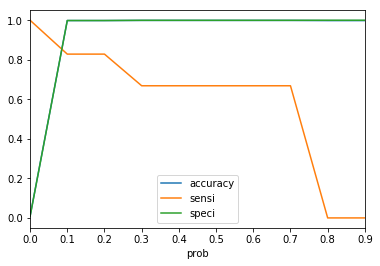

In [38]:
y_train_df = pd.DataFrame( {'y_train':y_train,'y_train_pred':y_train_pred,'y_train_prob':y_train_prob})

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df.y_train_prob.map(lambda x: 1 if x > i else 0)

    
# accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df.y_train, y_train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

    
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [39]:
cut_off_prob =0.1


y_test_pred=dt_final.predict(X_test)
y_test_prob=dt_final.predict_proba(X_test)[:,1]



#creating a new df to store prediction values
y_test_pred_df1 = pd.DataFrame({'y_test':y_test.values, 'y_test_pred':y_test_pred,"y_test_prob":y_test_prob })


# Creating new column 'predicted' with 1 if Prob > else 0
y_test_pred_df1['final_predicted'] = y_test_pred_df1.y_test_prob.map( lambda x: 1 if x > cut_off_prob else 0)



getModelMetrics(y_test_pred_df1.y_test,y_test_pred_df1.final_predicted)

Accuracy score: 0.9984551104244935
Recall : 0.8602941176470589
Precision: 0.508695652173913
F1 score : 0.6393442622950819


#### RANDOM FOREST


Let's first fit a random forest model with default hyperparameters.

In [40]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [41]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# Making predictions
predictions = rfc.predict(X_test)

In [43]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [44]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [45]:
print(accuracy_score(y_test,predictions))

0.9996488887328394


###### Random Search to Find Optimal Hyperparameters

In [46]:
#the following code has been commented as it takes long time to execute

In [60]:
'''from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [2,4,6,8,10],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [1, 10, 25, 50, 75, 100],
    'min_samples_split': [2,3,5,7,9],
    'n_estimators': [10, 50, 100, 200, 400,500,700,1000,1500,2000], 
    'max_features': ['auto'],
    'max_leaf_nodes':[None,10 ,25, 50, 100, 500]
}
# Create a based model
rf = RandomForestClassifier(random_state=48)

# Instantiate the grid search model
gr_search = RandomizedSearchCV(estimator = rf, 
                              param_distributions = param_grid, 
                              cv = 3, n_jobs = -1,
                              verbose = 1,scoring="roc_auc",
                              random_state=48)


Fit the grid search to the data
gr_search.fit(X_train, y_train)


# printing the optimal accuracy score and hyperparameters
print('Roc_auc:',gr_search.best_score_,)
print('Best params:',gr_search.best_params_)
'''

'from sklearn.model_selection import RandomizedSearchCV\n# Create the parameter grid based on the results of random search \n\nparam_grid = {\n    \'max_depth\': [2,4,6,8,10],\n    \'criterion\' : [\'gini\', \'entropy\'],\n    \'min_samples_leaf\': [1, 10, 25, 50, 75, 100],\n    \'min_samples_split\': [2,3,5,7,9],\n    \'n_estimators\': [10, 50, 100, 200, 400,500,700,1000,1500,2000], \n    \'max_features\': [\'auto\'],\n    \'max_leaf_nodes\':[None,10 ,25, 50, 100, 500]\n}\n# Create a based model\nrf = RandomForestClassifier(random_state=48)\n\n# Instantiate the grid search model\ngr_search = RandomizedSearchCV(estimator = rf, \n                              param_distributions = param_grid, \n                              cv = 3, n_jobs = -1,\n                              verbose = 1,scoring="roc_auc",\n                              random_state=48)\n\n\nFit the grid search to the data\ngr_search.fit(X_train, y_train)\n\n\n# printing the optimal accuracy score and hyperparameters\npr

![alt text](random_hp.png "Title")

###### **Fitting the final model with the best parameters obtained from random search.**

In [48]:
# model with the best hyperparameters

rf_final = RandomForestClassifier(max_depth=6,
                             min_samples_leaf=1, 
                             min_samples_split=9,
                             max_features='auto',
                             criterion='entropy',
                             n_estimators = 400,
                             max_leaf_nodes= 500,
                             random_state = 48)

#Fit the algorithm on the data
rf_final.fit(X_train,y_train)

#Predict training set:
y_train_pred= rf_final.predict(X_train)
y_train_prob = rf_final.predict_proba(X_train)[:,1]

#Let's check the model metrices.
getModelMetrics(y_train,y_train_pred)

Accuracy score: 0.9995836760899661
Recall : 0.7921348314606742
Precision: 0.9690721649484536
F1 score : 0.8717156105100465


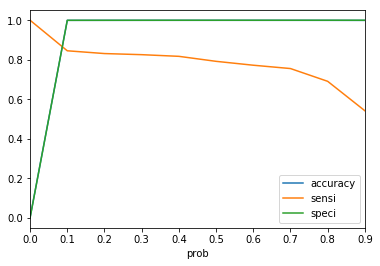

In [49]:
y_train_df = pd.DataFrame( {'y_train':y_train,'y_train_pred':y_train_pred,'y_train_prob':y_train_prob})

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df.y_train_prob.map(lambda x: 1 if x > i else 0)

    
# accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df.y_train, y_train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

    
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [50]:
cut_off_prob =0.1


y_test_pred=rf_final.predict(X_test)
y_test_prob=rf_final.predict_proba(X_test)[:,1]



#creating a new df to store prediction values
y_test_pred_df1 = pd.DataFrame({'y_test':y_test.values, 'y_test_pred':y_test_pred,"y_test_prob":y_test_prob })


# Creating new column 'predicted' with 1 if Prob > else 0
y_test_pred_df1['final_predicted'] = y_test_pred_df1.y_test_prob.map( lambda x: 1 if x > cut_off_prob else 0)



getModelMetrics(y_test_pred_df1.y_test,y_test_pred_df1.final_predicted)

Accuracy score: 0.9992626663389628
Recall : 0.875
Precision: 0.7212121212121212
F1 score : 0.7906976744186047


#### XGBOOST CLASSIFIER

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance



In [52]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

array([[9.85705853e-03, 9.90142941e-01],
       [9.99893546e-01, 1.06424297e-04],
       [9.99846101e-01, 1.53906585e-04],
       [9.99866009e-01, 1.33961672e-04],
       [9.99923468e-01, 7.65458026e-05],
       [9.99838352e-01, 1.61666307e-04],
       [9.99884009e-01, 1.15981595e-04],
       [9.99879837e-01, 1.20175777e-04],
       [9.99862134e-01, 1.37886513e-04],
       [9.99827802e-01, 1.72194661e-04]], dtype=float32)

In [54]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.13%


##### Let's now try tuning the hyperparameters using  grid search CV to find the optimal values of hyperparameters.

By adjusting the learning rate to less than 1, we can regularize the model. **A model with higher learning_rate learns fast, but is prone to overfitting; one with a lower learning rate learns slowly, but avoids overfitting**

Also, there's a trade-off between **learning_rate and n_estimators - the higher the learning rate, the lesser trees the model needs (and thus we usually tune only one of them)**.

Also, by subsampling (setting subsample to less than 1), we can have the individual models built on random subsamples of size subsample. That way, each tree will be trained on different subsets and reduce the model's variance.

In [55]:
'''
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.8, 0.9], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200,random_state=42)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds,n_jobs=-1, 
                        verbose = 1,
                        return_train_score=True)
                              
# fit the model
model_cv.fit(X_train, y_train)  


'''

"\n# hyperparameter tuning with XGBoost\n\n# creating a KFold object \nfolds = 3\n\n# specify range of hyperparameters\nparam_grid = {'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.8, 0.9], \n             'subsample': [0.3, 0.6, 0.9]}          \n\n\n# specify model\nxgb_model = XGBClassifier(max_depth=2, n_estimators=200,random_state=42)\n\n# set up GridSearchCV()\nmodel_cv = GridSearchCV(estimator = xgb_model, \n                        param_grid = param_grid, \n                        scoring= 'roc_auc', \n                        cv = folds,n_jobs=-1, \n                        verbose = 1,\n                        return_train_score=True)\n                              \n# fit the model\nmodel_cv.fit(X_train, y_train)  \n\n\n"

In [56]:
'''
# printing the optimal accuracy score and hyperparameters
print('Roc_auc:',model_cv.best_score_,)
print('Best params:',model_cv.best_params_)
'''

"\n# printing the optimal accuracy score and hyperparameters\nprint('Roc_auc:',model_cv.best_score_,)\nprint('Best params:',model_cv.best_params_)\n"

##### #Let's build a final model with the chosen hyperparameters.

In [57]:
# model with the best hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

xgboost_final = XGBClassifier(learning_rate = 0.1,
                              max_depth = 2, 
                              n_estimators = 200,
                              subsample = 0.6,
                              objective = 'binary:logistic')

#Fit the algorithm on the data
xgboost_final.fit(X_train,y_train)

#Predict training set:
y_train_pred= xgboost_final.predict(X_train)
y_train_prob = xgboost_final.predict_proba(X_train)[:,1]

#Let's check the model metrices.
getModelMetrics(y_train,y_train_pred)

Accuracy score: 0.9996639313015389
Recall : 0.8286516853932584
Precision: 0.9800664451827242
F1 score : 0.898021308980213


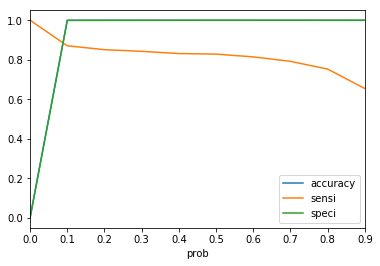

In [58]:
y_train_df = pd.DataFrame( {'y_train':y_train,'y_train_pred':y_train_pred,'y_train_prob':y_train_prob})

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df.y_train_prob.map(lambda x: 1 if x > i else 0)

    
# accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df.y_train, y_train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

    
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [59]:
cut_off_prob =0.1


y_test_pred=xgboost_final.predict(X_test)
y_test_prob=xgboost_final.predict_proba(X_test)[:,1]



#creating a new df to store prediction values
y_test_pred_df1 = pd.DataFrame({'y_test':y_test.values, 'y_test_pred':y_test_pred,"y_test_prob":y_test_prob })


# Creating new column 'predicted' with 1 if Prob > else 0
y_test_pred_df1['final_predicted'] = y_test_pred_df1.y_test_prob.map( lambda x: 1 if x > cut_off_prob else 0)



getModelMetrics(y_test_pred_df1.y_test,y_test_pred_df1.final_predicted)

Accuracy score: 0.9993445923013002
Recall : 0.875
Precision: 0.7531645569620253
F1 score : 0.8095238095238096


Following are the test results obtained from different models


>Logistic Regression

    Roc_auc: 0.9742
    Accuracy score: 0.9992626552436749
    Recall : 0.7865168539325843
    Precision: 0.7977207977207977
    F1 score : 0.7920792079207921

>Decision Trees:

    Roc_auc: 0.950841549387626
    Accuracy score: 0.9988663951365342
    Recall : 0.5955056179775281
    Precision: 0.7210884353741497
    F1 score : 0.6523076923076924


>Random forest

    AUC-ROC score  : 0.978
    Accuracy score: 0.9992626663389628
    Recall : 0.875
    Precision: 0.7212121212121212
    F1 score : 0.7906976744186047


>xg boost 

    AUC-ROC score : 0.98
    Accuracy score: 0.9993445923013002
    Recall : 0.875
    Precision: 0.7531645569620253
    F1 score : 0.8095238095238096


From all the models, XG boost has the highest train ROC-AUC score of 0.98, with a good F1 score of 0.89, and this model gave a better precision and recall compared with other models.

In [62]:
clf = XGBClassifier(learning_rate = 0.1,
                              max_depth = 2, 
                              n_estimators = 200,
                              subsample = 0.6,
                              objective = 'binary:logistic')

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 12


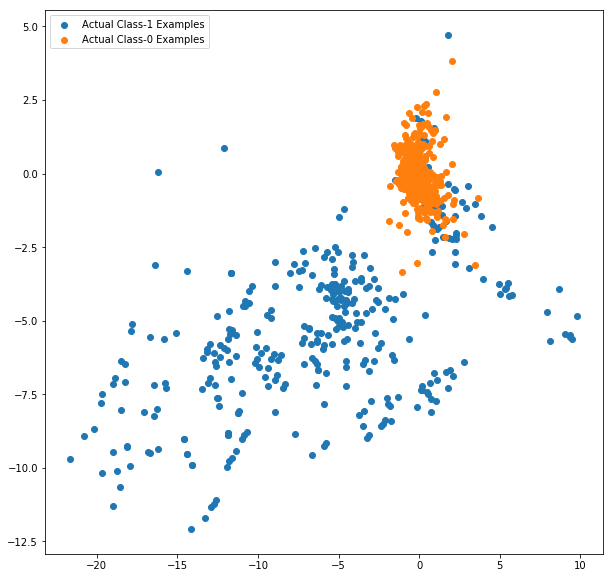

In [64]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :

- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

def model_result(classifier, name, grid, X_train, y_train, scoring):
    
    rsearch=RandomizedSearchCV(classifier, 
                               grid,
                               cv=5, 
                               scoring = scoring,
                               n_iter =100,
                               random_state=41)
    
    rsearch.fit(X_train, y_train)
    
       
    print("Estimator" , rsearch.best_estimator_)
    print("best_params",rsearch.best_params_)
    print("best ROC_AUC" ,rsearch.best_score_)     

#### 1.Using SMOTE:

In [23]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


Using TensorFlow backend.


In [113]:
print(X_train_smote.shape,y_train_smote)
print(X_train_smote)

(398016, 29) [0 0 0 ... 1 1 1]
[[-1.24135323 -0.38525366  0.48917768 ...  0.97460115 -0.45102353
  -1.53670689]
 [-0.43339721 -2.20064542 -1.92319694 ... -0.71907234  0.35303073
   2.21702413]
 [-1.07393844 -0.43680592  1.88835474 ... -0.1618815   0.2846202
   0.73153043]
 ...
 [-0.88038794  0.26003521 -0.64860446 ...  1.14921076  0.5334816
   0.78390849]
 [-3.21271219  6.39156614 -6.4249332  ... -3.38538324 -1.54737533
   1.24487561]
 [-0.28665373  3.32489191 -2.90694927 ...  1.0944786   0.66397155
  -1.60819918]]


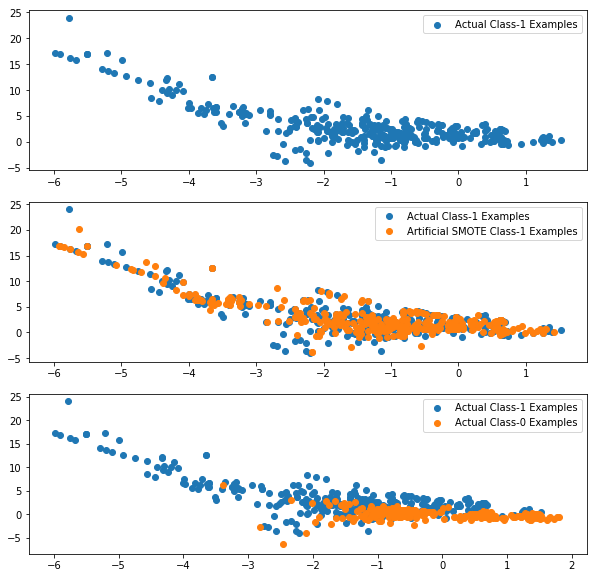

In [106]:
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [10,10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### using Logistic regression with SMOTE

In [69]:
model = {'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=88),
           'grid': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}}




model_result( model['classifier'],model['name'],model['grid'],X_train_smote,y_train_smote,'roc_auc')


Estimator LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=88, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best_params {'penalty': 'l2', 'C': 1000.0}
best ROC_AUC 0.9890027402434874


##### using Decision trees with SMOTE :

In [70]:
model = {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=88),
           'grid': {"max_depth":np.arange(8)+1}}



model_result( model['classifier'],model['name'],model['grid'],X_train_smote,y_train_smote,'roc_auc')



Estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=88, splitter='best')
best_params {'max_depth': 8}
best ROC_AUC 0.9937850764796675


##### Using Random forest with SMOTE:

In [ ]:
model = {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=88),
           'grid':  {
                    'max_depth': [2,4,6,8,10],
                    'criterion' : ['gini', 'entropy'],
                    'min_samples_leaf': [1, 10, 25, 50, 75, 100],
                    'min_samples_split': [2,3,5,7,9],
                    'n_estimators': [10, 50, 100, 200, 400,500,700,1000,1500,2000], 
                    'max_features': ['auto'],
                    'max_leaf_nodes':[None,10 ,25, 50, 100, 500]
                    }


results.append(model_result( model['classifier'],model['name'],model['grid'],X_train_smote,y_train_smote,'roc_auc'))



##### Using XG boost with SMOTE:

In [79]:
model = {'name': 'xgboost', 'label': 'XG boost',
           'classifier': XGBClassifier(n_estimators=200,random_state=42),
           'grid': {'learning_rate': [0.1, 0.5, 0.6, 0.9], 
                    'subsample': [0.3, 0.6, 0.9],
                     'max_depth' :[2,4]}  }


model_result( model['classifier'],model['name'],model['grid'],X_train_smote,y_train_smote,'roc_auc')

"model = {'name': 'xgboost', 'label': 'XG boost',\n           'classifier': XGBClassifier(n_estimators=200,random_state=42),\n           'grid': {'learning_rate': [0.1, 0.5, 0.6, 0.9], \n                    'subsample': [0.3, 0.6, 0.9],\n                     'max_depth' :[2,4]}  }\n\n\nmodel_result( model['classifier'],model['name'],model['grid'],X_train_smote,y_train_smote,'roc_auc')\n"

![alt text](smote.png "Title")

Following is the result from the different models


>Logistic Regression:

    best_params {'penalty': 'l2', 'C': 1000.0}
    best ROC_AUC 0.9890027402434874


>Decision Tree

    best_params {'max_depth': 8}
    best ROC_AUC 0.9937850764796675

    
>Random Forest

    best_params { 'n_estimators': 400, 'min_samples_leaf': 1,max_depth=10, max_features: 'auto'}
    best ROC_AUC 0.999528
    
    
>Xgboost

    best_params {'subsample': 0.9, 'max_depth': 4, 'learning_rate': 0.5}
    best ROC_AUC 0.99996
    

#### 2. Using ADASYN

In [71]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

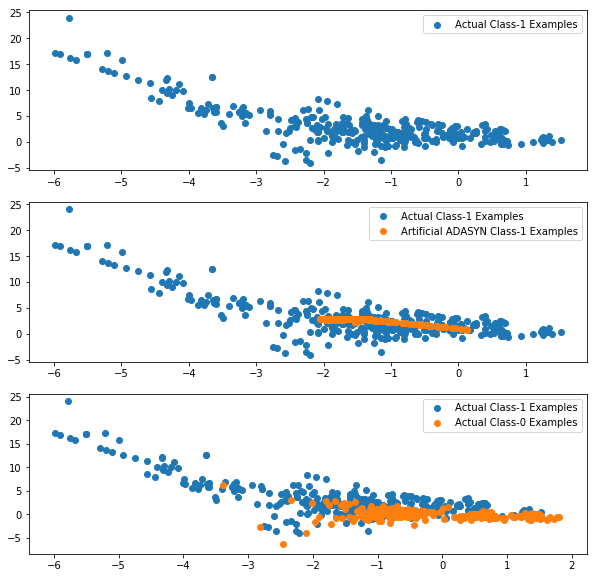

In [72]:

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [73]:
print(X_train_adasyn.shape)

(398005, 29)


#### Using Logistic regression to Adasyn

In [74]:
model = {'name': 'logreg','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=88),
           'grid': {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}}



model_result( model['classifier'],model['name'],model['grid'],X_train_adasyn,y_train_adasyn,'roc_auc')


Estimator LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=88, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best_params {'penalty': 'l2', 'C': 1000.0}
best ROC_AUC 0.9451449091910904


#### using Decision trees with Adaysn :

In [75]:
model = {'name': 'dsc','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=88),
           'grid': {"max_depth":np.arange(8)+1}}


model_result( model['classifier'],model['name'],model['grid'],X_train_adasyn,y_train_adasyn,'roc_auc')


Estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=88, splitter='best')
best_params {'max_depth': 7}
best ROC_AUC 0.9271794525806065


#### Using XG boost with Adasyn: 

In [ ]:
model = {'name': 'xgboost', 'label': 'XG boost',
           'classifier': XGBClassifier(n_estimators=200,random_state=42),
           'grid': {'learning_rate': [0.1,0.5,0.8, 0.9], 
                    'subsample': [0.3, 0.6, 0.9],
                     'max_depth' :[2,3,4]} }

model_result( model['classifier'],model['name'],model['grid'],X_train_adasyn,y_train_adasyn,'roc_auc'))





#### Using Random forest with Adasyn:

In [ ]:
model = {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=88),
           'grid':  {
                    'max_depth': [2,4,6,8,10],
                    'criterion' : ['gini', 'entropy'],
                    'min_samples_leaf': [1, 10, 25, 50, 75, 100],
                    'min_samples_split': [2,3,5,7,9],
                    'n_estimators': [10, 50, 100, 200, 400,500,700,1000,1500,2000], 
                    'max_features': ['auto'],
                    'max_leaf_nodes':[None,10 ,25, 50, 100, 500]
                    }



model_result( model['classifier'],model['name'],model['grid'],X_train_adasyn,y_train_adasyn,'roc_auc'))


![alt text](adasyn.png "Title")

##### Following is the result obtained from different models:


>Logistic Regression

    best_params {'penalty': 'l2', 'C': 1000.0}
    best ROC_AUC 0.9451449091910904

>Decision Tree

    best_params {'max_depth': 7}
    best ROC_AUC 0.9271794525806065

    
>Random Forest

    best_params {'n_estimators': 200, 'min_samples_leaf': 25,max_depth=10, max_features='auto'}
    best ROC_AUC 0.986571
    
    
>Xgboost

    best_params {'subsample': 0.6, 'max_depth': 4, 'learning_rate': 0.5  }
    best ROC_AUC 0.999334
 

From the results above, it is seen that "XG boost" works better with " Smote" model with roc_auc of 0.9996 ,hence we are using the best parameters to create a new model 

In [27]:
X_train_smote=pd.DataFrame(X_train_smote, columns=X_train.columns)


# model with the best hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc

xgboost_final = XGBClassifier(learning_rate = 0.5,
                              max_depth = 4, 
                              n_estimators = 200,
                              subsample = 0.9,
                              objective = 'binary:logistic')

#Fit the algorithm on the data
xgboost_final.fit(X_train_smote,y_train_smote)

#Predict training set:
y_train_pred= xgboost_final.predict(X_train_smote)
y_train_prob = xgboost_final.predict_proba(X_train_smote)[:,1]



In [47]:
#Let's check the model metrices.
getModelMetrics(y_train_smote,y_train_pred)

Accuracy score: 1.0
Recall : 1.0
Precision: 1.0
F1 score : 1.0


<Figure size 504x504 with 0 Axes>

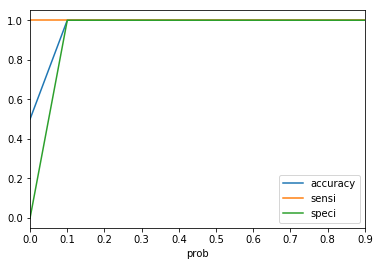

In [29]:
y_train_df = pd.DataFrame( {'y_train':y_train_smote,'y_train_pred':y_train_pred,'y_train_prob':y_train_prob})

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df.y_train_prob.map(lambda x: 1 if x > i else 0)

    
# accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_df.y_train, y_train_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

plt.figure(figsize=(7,7))    
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [43]:
cut_off_prob =0.5


y_test_pred=xgboost_final.predict(X_test)
y_test_prob=xgboost_final.predict_proba(X_test)[:,1]



#creating a new df to store prediction values
y_test_pred_df1 = pd.DataFrame({'y_test':y_test.values, 'y_test_pred':y_test_pred,"y_test_prob":y_test_prob })


# Creating new column 'predicted' with 1 if Prob > else 0
y_test_pred_df1['final_predicted'] = y_test_pred_df1.y_test_prob.map( lambda x: 1 if x > cut_off_prob else 0)



getModelMetrics(y_test_pred_df1.y_test,y_test_pred_df1.final_predicted)

Accuracy score: 0.9993679997191109
Recall : 0.8823529411764706
Precision: 0.759493670886076
F1 score : 0.8163265306122449


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


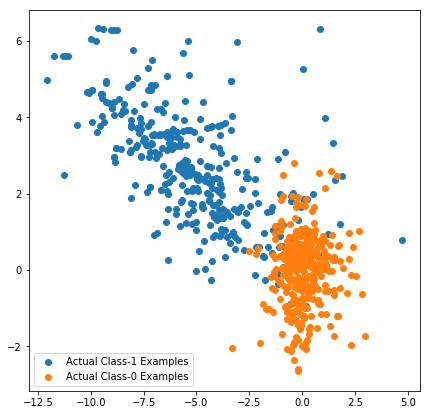

In [46]:
var_imp = []
for i in xgboost_final.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgboost_final.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgboost_final.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgboost_final.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgboost_final.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgboost_final.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [7,7]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()